In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import pyplot as plt

In [45]:
cov = ('C:\\Users\\computer\\Desktop\\Work\\AJ.Ton\\2019_nCoV_data.csv')

In [46]:
cov_df=pd.read_csv(cov)
cov_df

,Sno,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020 12:00:00,Anhui,China,01/22/2020 12:00:00,1.0,0.0,0.0
1,2,01/22/2020 12:00:00,Beijing,China,01/22/2020 12:00:00,14.0,0.0,0.0
2,3,01/22/2020 12:00:00,Chongqing,China,01/22/2020 12:00:00,6.0,0.0,0.0
3,4,01/22/2020 12:00:00,Fujian,China,01/22/2020 12:00:00,1.0,0.0,0.0
4,5,01/22/2020 12:00:00,Gansu,China,01/22/2020 12:00:00,0.0,0.0,0.0
5,6,01/22/2020 12:00:00,Guangdong,China,01/22/2020 12:00:00,26.0,0.0,0.0
6,7,01/22/2020 12:00:00,Guangxi,China,01/22/2020 12:00:00,2.0,0.0,0.0
7,8,01/22/2020 12:00:00,Guizhou,China,01/22/2020 12:00:00,1.0,0.0,0.0
8,9,01/22/2020 12:00:00,Hainan,China,01/22/2020 12:00:00,4.0,0.0,0.0
9,10,01/22/2020 12:00:00,Hebei,China,01/22/2020 12:00:00,1.0,0.0,0.0


In [52]:
cov1=cov_df[['Sno','Province/State','Country','Confirmed','Deaths','Recovered']]
cov1

,Sno,Province/State,Country,Confirmed,Deaths,Recovered
0,1,Anhui,China,1.0,0.0,0.0
1,2,Beijing,China,14.0,0.0,0.0
2,3,Chongqing,China,6.0,0.0,0.0
3,4,Fujian,China,1.0,0.0,0.0
4,5,Gansu,China,0.0,0.0,0.0
5,6,Guangdong,China,26.0,0.0,0.0
6,7,Guangxi,China,2.0,0.0,0.0
7,8,Guizhou,China,1.0,0.0,0.0
8,9,Hainan,China,4.0,0.0,0.0
9,10,Hebei,China,1.0,0.0,0.0


In [53]:
set(cov1['Country'])

{'Australia',
 'Belgium',
 'Brazil',
 'Cambodia',
 'Canada',
 'China',
 'Egypt',
 'Finland',
 'France',
 'Germany',
 'Hong Kong',
 'India',
 'Italy',
 'Ivory Coast',
 'Japan',
 'Macau',
 'Mainland China',
 'Malaysia',
 'Mexico',
 'Nepal',
 'Others',
 'Philippines',
 'Russia',
 'Singapore',
 'South Korea',
 'Spain',
 'Sri Lanka',
 'Sweden',
 'Taiwan',
 'Thailand',
 'UK',
 'US',
 'United Arab Emirates',
 'Vietnam'}

In [54]:
cov2=cov1[cov_df['Country'] != 'China']
cov2

,Sno,Province/State,Country,Confirmed,Deaths,Recovered
31,32,Washington,US,1.0,0.0,0.0
35,36,NaN,Japan,2.0,0.0,0.0
36,37,NaN,Thailand,2.0,0.0,0.0
37,38,NaN,South Korea,1.0,0.0,0.0
38,39,Anhui,Mainland China,9.0,0.0,0.0
39,40,Beijing,Mainland China,22.0,0.0,0.0
40,41,Chongqing,Mainland China,9.0,0.0,0.0
41,42,Fujian,Mainland China,5.0,0.0,0.0
42,43,Gansu,Mainland China,2.0,0.0,0.0
43,44,Guangdong,Mainland China,32.0,0.0,2.0


In [55]:
cov2.isnull().any()

Sno               False
Province/State     True
Country           False
Confirmed         False
Deaths            False
Recovered         False
dtype: bool

In [57]:
cov2['Province/State'].fillna('Unknown',inplace=True)

In [58]:
cov2.head()

,Sno,Province/State,Country,Confirmed,Deaths,Recovered
31,32,Washington,US,1.0,0.0,0.0
35,36,Unknown,Japan,2.0,0.0,0.0
36,37,Unknown,Thailand,2.0,0.0,0.0
37,38,Unknown,South Korea,1.0,0.0,0.0
38,39,Anhui,Mainland China,9.0,0.0,0.0


In [59]:
cov3 = cov2.groupby(['Country','Province/State']).mean().reset_index()
cov3

,Country,Province/State,Sno,Confirmed,Deaths,Recovered
0,Australia,New South Wales,938.363636,4.000000,0.000000,2.181818
1,Australia,Queensland,1003.450000,3.900000,0.000000,0.000000
2,Australia,South Australia,1110.529412,2.000000,0.000000,0.117647
3,Australia,Unknown,153.000000,2.666667,0.000000,0.000000
4,Australia,Victoria,939.409091,3.454545,0.000000,0.909091
5,Belgium,Unknown,1224.928571,1.000000,0.000000,0.071429
6,Brazil,Unknown,83.000000,0.000000,0.000000,0.000000
7,Cambodia,Unknown,948.681818,1.000000,0.000000,0.272727
8,Canada,British Columbia,974.285714,2.666667,0.000000,0.000000
9,Canada,"London, ON",1191.200000,1.000000,0.000000,0.400000


In [62]:
cov3.to_csv('2019_nCoV_data.csv')

In [63]:
cov_19 =cov2.iloc[:,:]
cov_19

,Sno,Province/State,Country,Confirmed,Deaths,Recovered
31,32,Washington,US,1.0,0.0,0.0
35,36,Unknown,Japan,2.0,0.0,0.0
36,37,Unknown,Thailand,2.0,0.0,0.0
37,38,Unknown,South Korea,1.0,0.0,0.0
38,39,Anhui,Mainland China,9.0,0.0,0.0
39,40,Beijing,Mainland China,22.0,0.0,0.0
40,41,Chongqing,Mainland China,9.0,0.0,0.0
41,42,Fujian,Mainland China,5.0,0.0,0.0
42,43,Gansu,Mainland China,2.0,0.0,0.0
43,44,Guangdong,Mainland China,32.0,0.0,2.0


####  Barchart (กราฟแท่ง)

Text(0.5, 0, 'Confirmed')

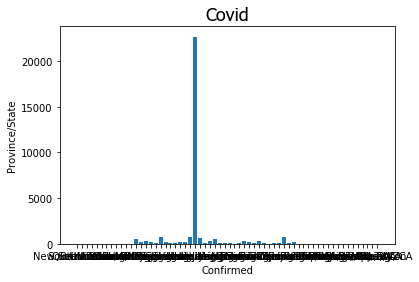

In [70]:
plt.bar(cov3.iloc[:,1],cov3.iloc[:,3])  
plt.title('Covid',fontname = 'Tahoma',fontsize=18) 
plt.ylabel('Province/State')
plt.xlabel('Confirmed')

In [73]:
cov_19_np = cov_19.iloc[:50,:-1].to_numpy()
cov_19_np[:10,:]

array([[32, 'Washington', 'US', 1.0, 0.0],
       [36, 'Unknown', 'Japan', 2.0, 0.0],
       [37, 'Unknown', 'Thailand', 2.0, 0.0],
       [38, 'Unknown', 'South Korea', 1.0, 0.0],
       [39, 'Anhui', 'Mainland China', 9.0, 0.0],
       [40, 'Beijing', 'Mainland China', 22.0, 0.0],
       [41, 'Chongqing', 'Mainland China', 9.0, 0.0],
       [42, 'Fujian', 'Mainland China', 5.0, 0.0],
       [43, 'Gansu', 'Mainland China', 2.0, 0.0],
       [44, 'Guangdong', 'Mainland China', 32.0, 0.0]], dtype=object)

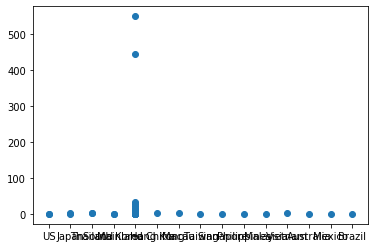

In [81]:
plt.scatter(cov_19_np[:,2],cov_19_np[:,3])

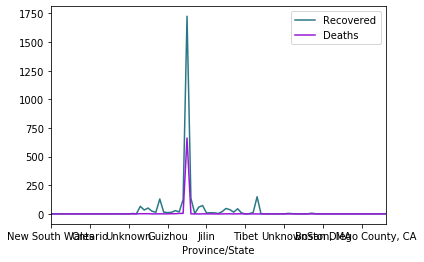

In [84]:
ax = plt.gca() 
cov3.plot(kind='line',x='Province/State',y='Recovered',color='#2a7886',ax=ax) 
cov3.plot(kind='line',x='Province/State',y='Deaths', color='#9818d6', ax=ax) 
plt.show()